# CNN para Classificação CIFAR-10

Este notebook implementa uma Rede Neural Convolucional (CNN) para classificação de objetos usando o dataset CIFAR-10.

**Objetivo:** Classificar imagens em 10 categorias diferentes usando Keras 3 com PyTorch como backend.

**Dataset:** CIFAR-10 - 60.000 imagens coloridas de 32x32 pixels em 10 classes.

In [27]:
# Importando bibliotecas necessárias
import os
os.environ["KERAS_BACKEND"] = "torch"  # Configurando PyTorch como backend

import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

print(f"Keras version: {keras.__version__}")
print(f"Keras backend: {keras.backend.backend()}")

Keras version: 3.11.3
Keras backend: torch


In [28]:
# Carregando o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Nomes das classes do CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Forma dos dados de treino: {x_train.shape}")
print(f"Forma dos rótulos de treino: {y_train.shape}")
print(f"Forma dos dados de teste: {x_test.shape}")
print(f"Forma dos rótulos de teste: {y_test.shape}")
print(f"Número de classes: {len(class_names)}")
print(f"Classes: {class_names}")

Forma dos dados de treino: (50000, 32, 32, 3)
Forma dos rótulos de treino: (50000, 1)
Forma dos dados de teste: (10000, 32, 32, 3)
Forma dos rótulos de teste: (10000, 1)
Número de classes: 10
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


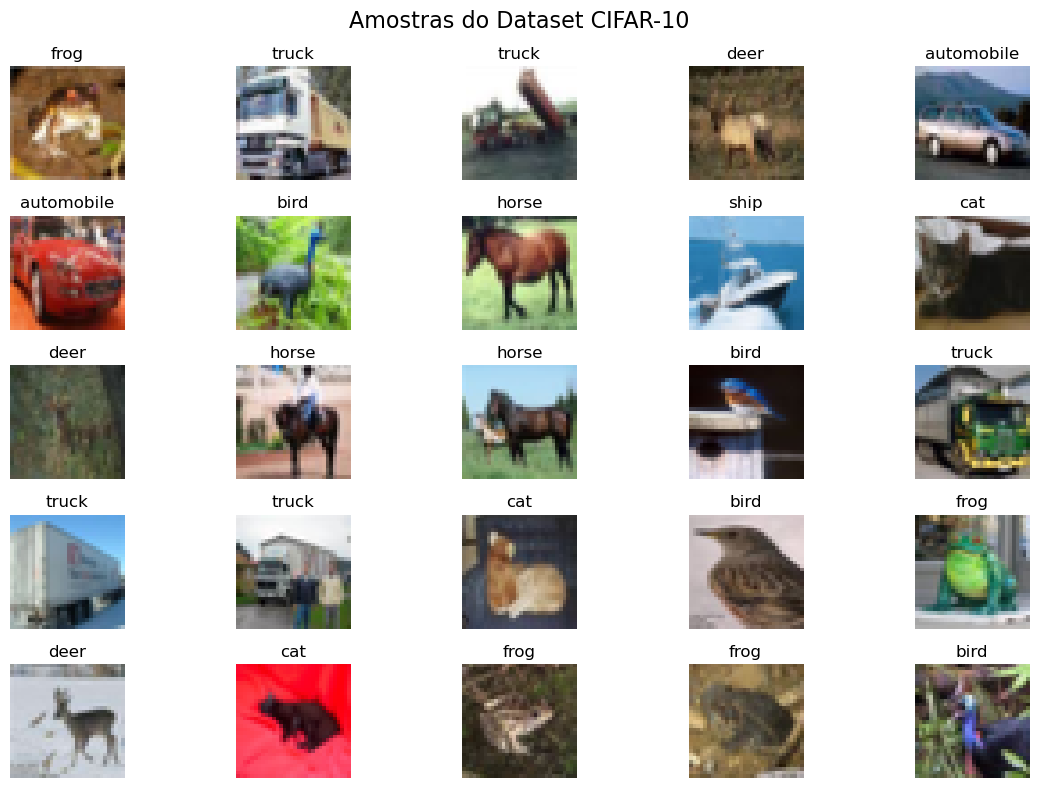

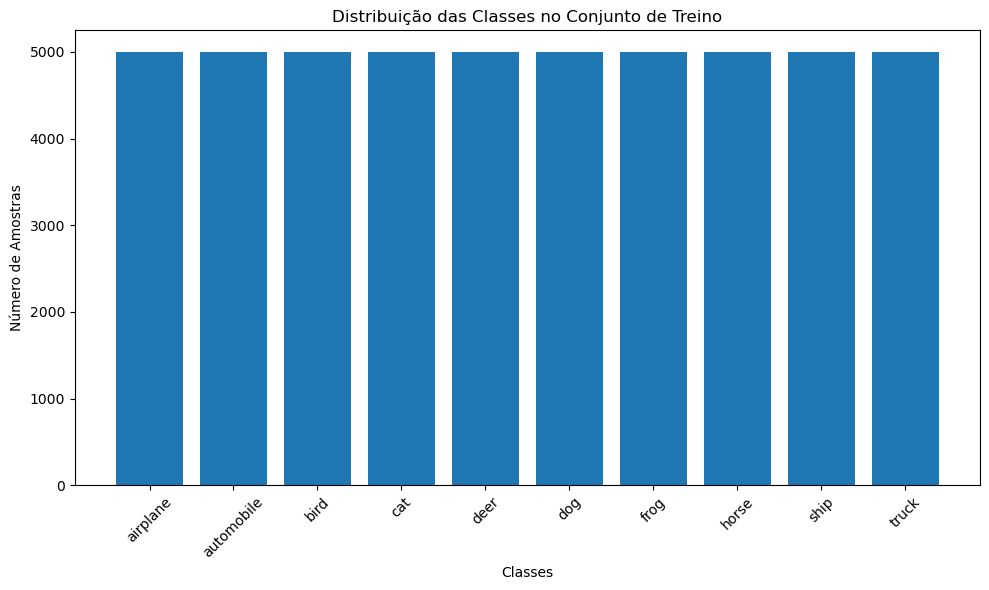

In [29]:
# Visualizando algumas amostras do dataset
plt.figure(figsize=(12, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'{class_names[y_train[i][0]]}')
    plt.axis('off')
plt.suptitle('Amostras do Dataset CIFAR-10', fontsize=16)
plt.tight_layout()
plt.show()

# Verificando a distribuição das classes
plt.figure(figsize=(10, 6))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar([class_names[i] for i in unique], counts)
plt.title('Distribuição das Classes no Conjunto de Treino')
plt.xlabel('Classes')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Pré-processamento dos dados
# Normalização: convertendo pixels para valores entre 0 e 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertendo rótulos para formato categórico (one-hot encoding)
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print("Dados normalizados:")
print(f"Faixa de valores em x_train: [{x_train.min():.2f}, {x_train.max():.2f}]")
print(f"Forma dos rótulos categóricos de treino: {y_train_categorical.shape}")
print(f"Forma dos rótulos categóricos de teste: {y_test_categorical.shape}")

# Exemplo de rótulo original vs categórico
print(f"\nExemplo - Rótulo original: {y_train[0]}")
print(f"Rótulo categórico: {y_train_categorical[0]}")

Dados normalizados:
Faixa de valores em x_train: [0.00, 1.00]
Forma dos rótulos categóricos de treino: (50000, 10)
Forma dos rótulos categóricos de teste: (10000, 10)

Exemplo - Rótulo original: [6]
Rótulo categórico: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [31]:
# Construindo a arquitetura da CNN
def create_cnn_model():
    model = Sequential([
        # Primeiro bloco convolucional
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        
        # Segundo bloco convolucional
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Dropout(0.25),
        
        # Terceiro bloco convolucional
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        
        # Camadas densas
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes do CIFAR-10
    ])
    
    return model

# Criando o modelo
model = create_cnn_model()

# Compilando o modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Exibindo a arquitetura do modelo
print("Arquitetura da CNN:")
model.summary()

Arquitetura da CNN:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,834 (2.81 MB)

 Trainable params: 736,362 (2.81 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [32]:
# Treinando o modelo
print("Iniciando o treinamento...")

# Definindo callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

# Treinamento
history = model.fit(
    x_train, y_train_categorical,
    batch_size=32,
    epochs=50,
    validation_data=(x_test, y_test_categorical),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("Treinamento concluído!")

Iniciando o treinamento...
Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.4228 - loss: 1.7146 - val_accuracy: 0.5541 - val_loss: 1.2837 - learning_rate: 0.0010
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.4228 - loss: 1.7146 - val_accuracy: 0.5541 - val_loss: 1.2837 - learning_rate: 0.0010
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.5844 - loss: 1.1753 - val_accuracy: 0.6147 - val_loss: 1.0868 - learning_rate: 0.0010
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.5844 - loss: 1.1753 - val_accuracy: 0.6147 - val_loss: 1.0868 - learning_rate: 0.0010
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6449 - loss: 1.0112 - val_accuracy: 0.6490 - val_loss: 1.0123 - learning_rate: 0.0010
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6449 - loss: 1.0112 - val_accuracy: 0.6490 - val_loss: 1.0123 - learning_rate: 0.0010
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━

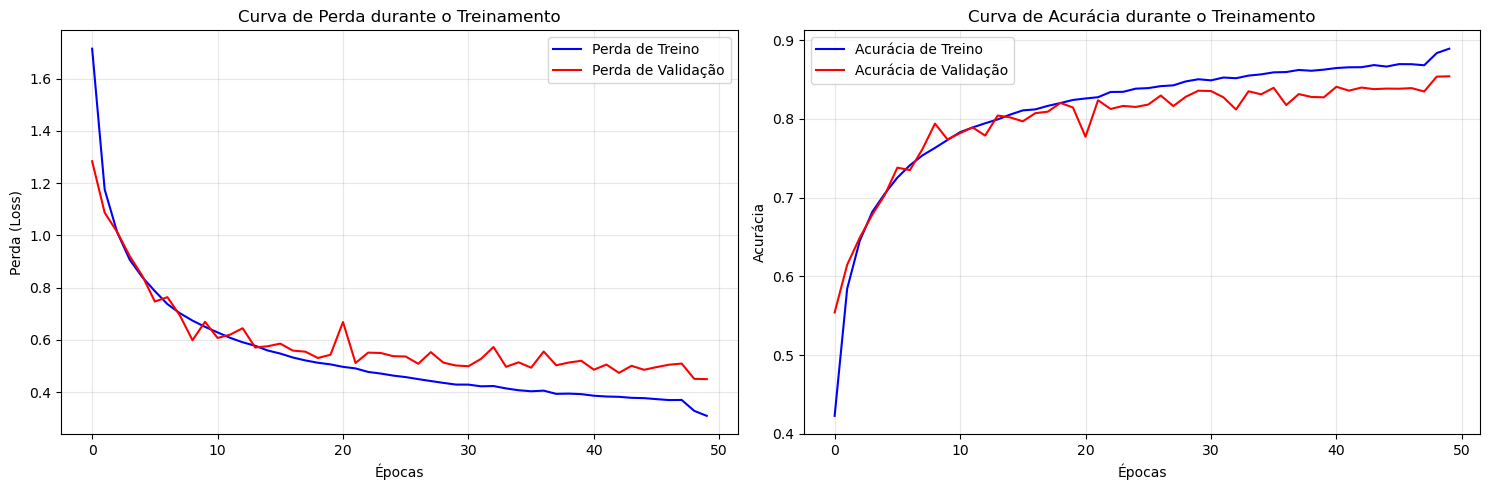


Métricas Finais:
Perda de Treino: 0.3088
Perda de Validação: 0.4494
Acurácia de Treino: 0.8891
Acurácia de Validação: 0.8540


In [33]:
# Plotando as curvas de treinamento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Curva de perda (erro)
ax1.plot(history.history['loss'], label='Perda de Treino', color='blue')
ax1.plot(history.history['val_loss'], label='Perda de Validação', color='red')
ax1.set_title('Curva de Perda durante o Treinamento')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Perda (Loss)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Curva de acurácia
ax2.plot(history.history['accuracy'], label='Acurácia de Treino', color='blue')
ax2.plot(history.history['val_accuracy'], label='Acurácia de Validação', color='red')
ax2.set_title('Curva de Acurácia durante o Treinamento')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Acurácia')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Exibindo métricas finais
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nMétricas Finais:")
print(f"Perda de Treino: {final_train_loss:.4f}")
print(f"Perda de Validação: {final_val_loss:.4f}")
print(f"Acurácia de Treino: {final_train_acc:.4f}")
print(f"Acurácia de Validação: {final_val_acc:.4f}")

In [34]:
# Avaliando o modelo no conjunto de teste
print("Avaliando o modelo no conjunto de teste...")
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)
print(f"Perda no teste: {test_loss:.4f}")
print(f"Acurácia no teste: {test_accuracy:.4f}")

# Fazendo predições
print("\nFazendo predições...")
y_pred_proba = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

print(f"Forma das predições: {y_pred.shape}")
print(f"Forma dos rótulos verdadeiros: {y_true.shape}")

Avaliando o modelo no conjunto de teste...
Perda no teste: 0.4494
Acurácia no teste: 0.8540

Fazendo predições...
Perda no teste: 0.4494
Acurácia no teste: 0.8540

Fazendo predições...
Forma das predições: (10000,)
Forma dos rótulos verdadeiros: (10000,)
Forma das predições: (10000,)
Forma dos rótulos verdadeiros: (10000,)


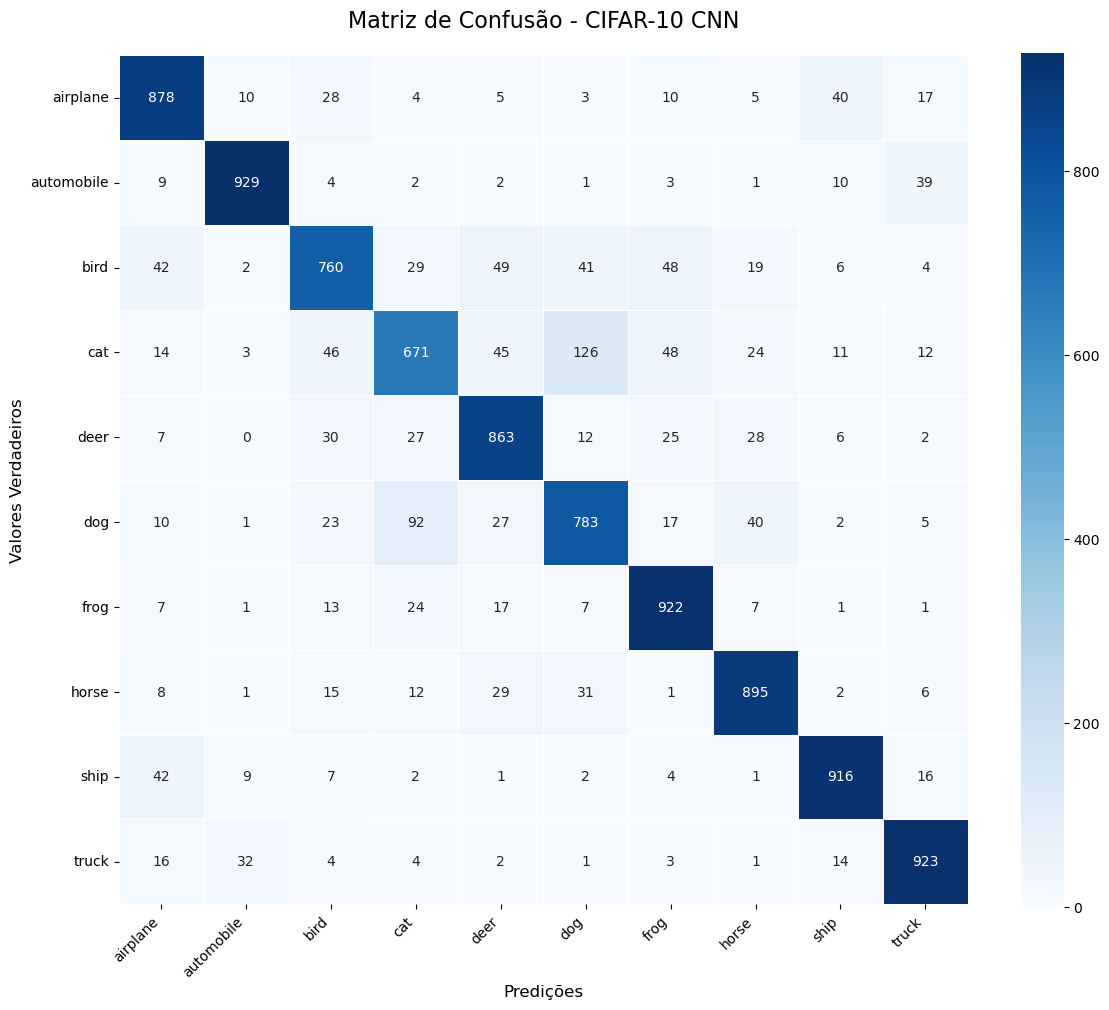

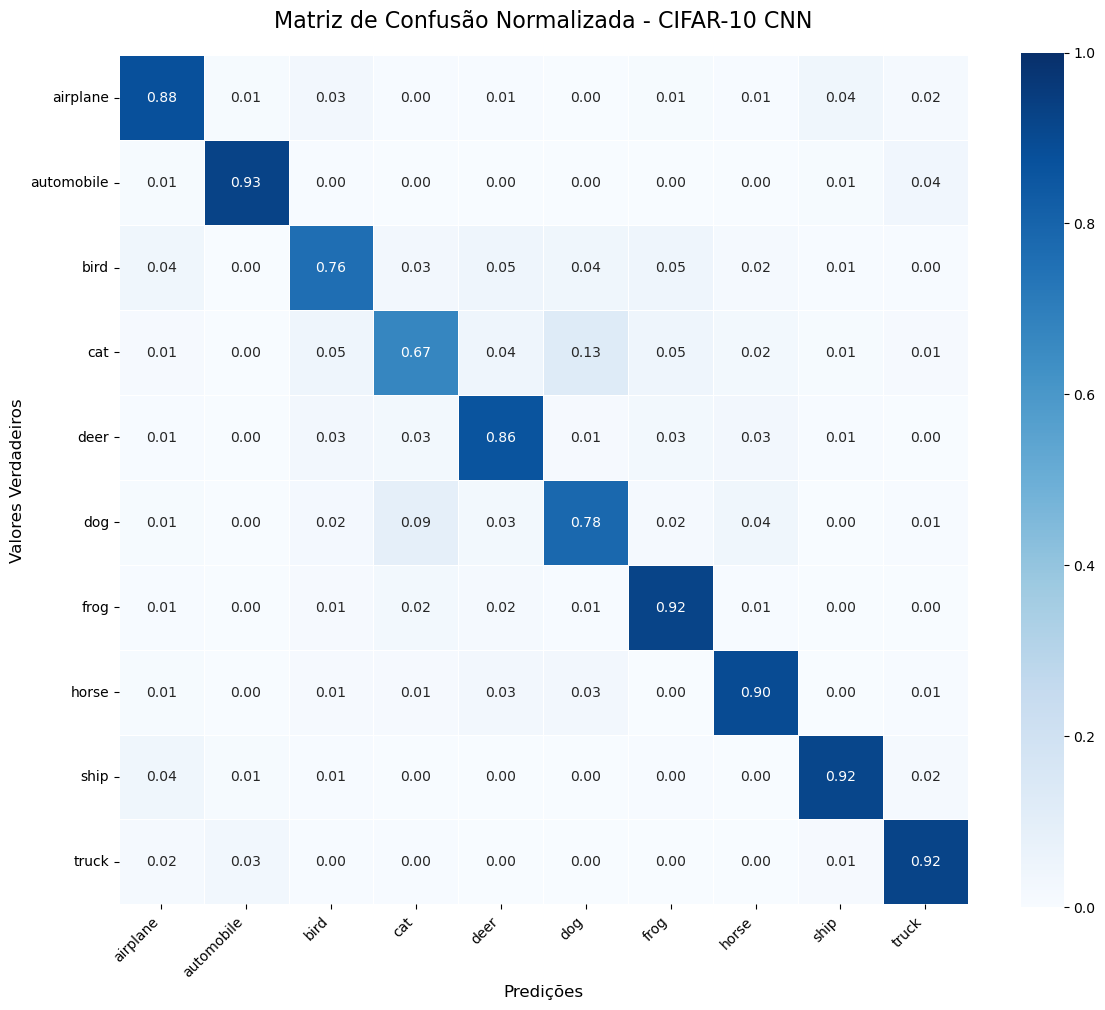

In [35]:
# Criando a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            square=True, linewidths=0.5)
plt.title('Matriz de Confusão - CIFAR-10 CNN', fontsize=16, pad=20)
plt.xlabel('Predições', fontsize=12)
plt.ylabel('Valores Verdadeiros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Matriz de confusão normalizada
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            square=True, linewidths=0.5, vmin=0, vmax=1)
plt.title('Matriz de Confusão Normalizada - CIFAR-10 CNN', fontsize=16, pad=20)
plt.xlabel('Predições', fontsize=12)
plt.ylabel('Valores Verdadeiros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
# Relatório de classificação detalhado
print("Relatório de Classificação:")
print("=" * 50)
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(report)

# Calculando métricas por classe
from sklearn.metrics import precision_score, recall_score, f1_score

precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)
f1_per_class = f1_score(y_true, y_pred, average=None)

# Criando DataFrame com métricas
import pandas as pd
metrics_df = pd.DataFrame({
    'Classe': class_names,
    'Precisão': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_per_class,
    'Suporte': cm.sum(axis=1)
})

print("\nMétricas Detalhadas por Classe:")
print(metrics_df.round(4))

Relatório de Classificação:
              precision    recall  f1-score   support

    airplane     0.8500    0.8780    0.8637      1000
  automobile     0.9403    0.9290    0.9346      1000
        bird     0.8172    0.7600    0.7876      1000
         cat     0.7739    0.6710    0.7188      1000
        deer     0.8298    0.8630    0.8461      1000
         dog     0.7776    0.7830    0.7803      1000
        frog     0.8529    0.9220    0.8861      1000
       horse     0.8766    0.8950    0.8857      1000
        ship     0.9087    0.9160    0.9124      1000
       truck     0.9005    0.9230    0.9116      1000

    accuracy                         0.8540     10000
   macro avg     0.8527    0.8540    0.8527     10000
weighted avg     0.8527    0.8540    0.8527     10000


Métricas Detalhadas por Classe:
       Classe  Precisão  Recall  F1-Score  Suporte
0    airplane    0.8500   0.878    0.8637     1000
1  automobile    0.9403   0.929    0.9346     1000
2        bird    0.8172   0

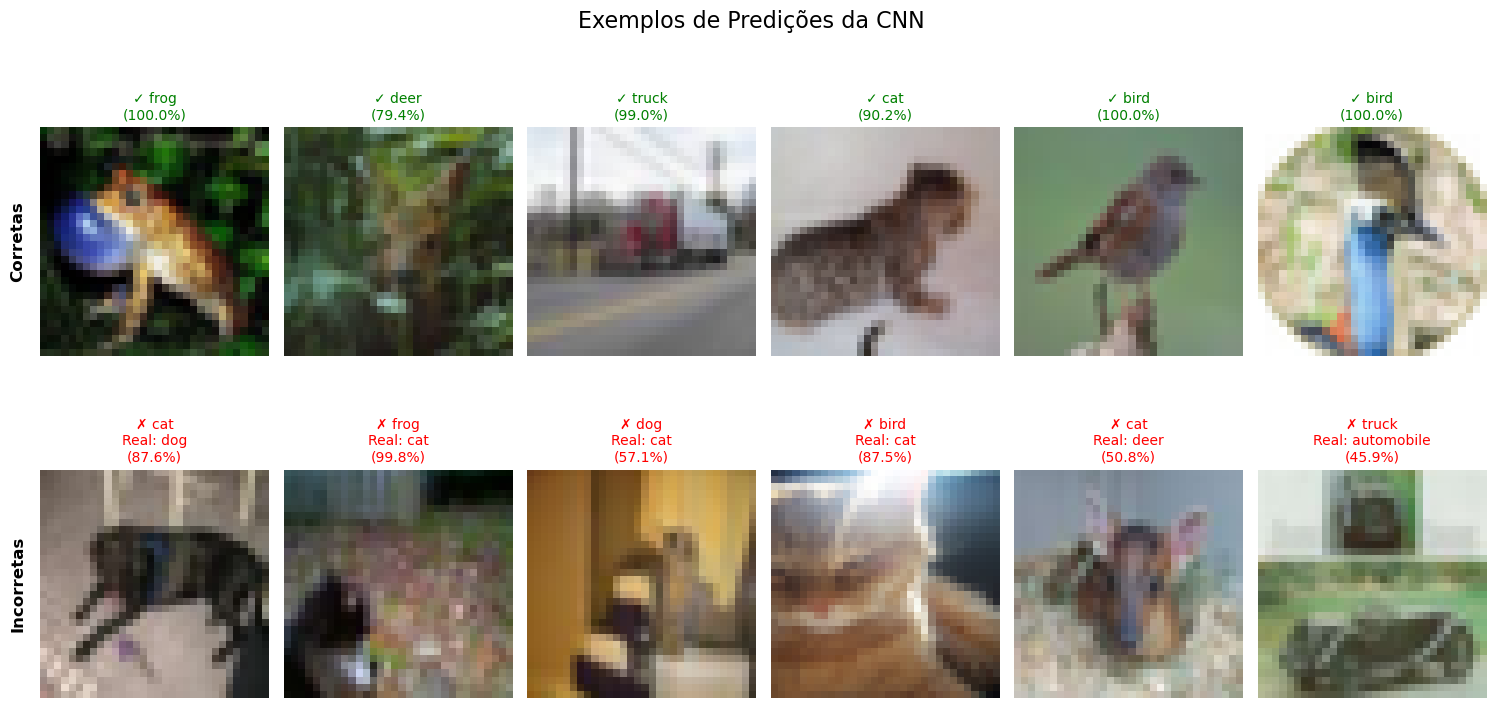

In [37]:
# Visualizando algumas predições
def plot_predictions(x_test, y_true, y_pred, y_pred_proba, class_names, num_samples=12):
    """Plota predições corretas e incorretas"""
    
    # Encontrando predições corretas e incorretas
    correct_indices = np.where(y_pred == y_true)[0]
    incorrect_indices = np.where(y_pred != y_true)[0]
    
    # Selecionando amostras aleatórias
    correct_samples = np.random.choice(correct_indices, size=num_samples//2, replace=False)
    incorrect_samples = np.random.choice(incorrect_indices, size=num_samples//2, replace=False)
    
    fig, axes = plt.subplots(2, num_samples//2, figsize=(15, 8))
    
    # Plotando predições corretas
    for i, idx in enumerate(correct_samples):
        axes[0, i].imshow(x_test[idx])
        pred_class = class_names[y_pred[idx]]
        true_class = class_names[y_true[idx]]
        confidence = y_pred_proba[idx][y_pred[idx]] * 100
        axes[0, i].set_title(f'✓ {pred_class}\n({confidence:.1f}%)', color='green', fontsize=10)
        axes[0, i].axis('off')
    
    # Plotando predições incorretas
    for i, idx in enumerate(incorrect_samples):
        axes[1, i].imshow(x_test[idx])
        pred_class = class_names[y_pred[idx]]
        true_class = class_names[y_true[idx]]
        confidence = y_pred_proba[idx][y_pred[idx]] * 100
        axes[1, i].set_title(f'✗ {pred_class}\nReal: {true_class}\n({confidence:.1f}%)', 
                           color='red', fontsize=10)
        axes[1, i].axis('off')
    
    axes[0, 0].text(-0.1, 0.5, 'Corretas', rotation=90, va='center', ha='center',
                   transform=axes[0, 0].transAxes, fontsize=12, fontweight='bold')
    axes[1, 0].text(-0.1, 0.5, 'Incorretas', rotation=90, va='center', ha='center',
                   transform=axes[1, 0].transAxes, fontsize=12, fontweight='bold')
    
    plt.suptitle('Exemplos de Predições da CNN', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plotando as predições
plot_predictions(x_test, y_true, y_pred, y_pred_proba, class_names)

In [38]:
# Salvando o modelo treinado
model_path = 'modelo_cifar10_cnn.keras'
model.save(model_path)
print(f"Modelo salvo em: {model_path}")

# Resumo final dos resultados
print("\n" + "="*60)
print("RESUMO FINAL DOS RESULTADOS")
print("="*60)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Perda no conjunto de teste: {test_loss:.4f}")
print(f"Número total de parâmetros: {model.count_params():,}")
print(f"Épocas de treinamento: {len(history.history['loss'])}")
print(f"Modelo salvo em: {model_path}")
print("="*60)

Modelo salvo em: modelo_cifar10_cnn.keras

RESUMO FINAL DOS RESULTADOS
Acurácia no conjunto de teste: 0.8540 (85.40%)
Perda no conjunto de teste: 0.4494
Número total de parâmetros: 737,834
Épocas de treinamento: 50
Modelo salvo em: modelo_cifar10_cnn.keras
